In [16]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [22]:
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = iris.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [24]:
svc = SVC()

In [25]:
param_grid = {'C': [0.1,0.001, 1,1000],
              'gamma': [0.1,0.001,1,1000]}
grid_search = GridSearchCV(svc, param_grid,cv=6)
grid_search.fit(X_train, y_train)
c = grid_search.best_params_['C']
gamma = grid_search.best_params_['gamma']
print(grid_search.best_params_)

{'C': 1000, 'gamma': 0.1}


In [26]:
svc_new = SVC(gamma=gamma, C=c, random_state=42)

In [27]:
svc_new.fit(X_train, y_train)
y_pred = svc_new.predict(X_test)
svc_new.score(X_test, y_test)

0.8

In [28]:
def plot_decision_boundary(X, y, model, ax):
    # Define the grid range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    
    # Plot the training points
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap_bold, edgecolor='k')
    
    # Label the plot
    ax.set_title(f"SVM Decision Boundary (C={model.C}, gamma={model.gamma})")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend(*scatter.legend_elements(), title="Classes")

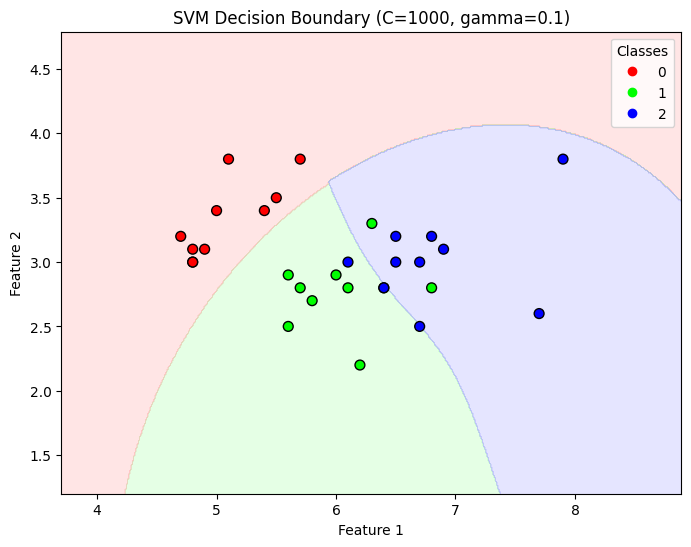

In [29]:
# Create a subplot
fig, ax = plt.subplots(figsize=(8, 6))
# Plot the decision boundary
plot_decision_boundary(X_test, y_test, svc_new, ax)

# Show the plot
plt.show()